In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = {
    'Student_ID': range(1, 11),
    'Math_Score': [88, 92, np.nan, 55, 72, 91, 200, 67, 59, 63],     
    'English_Score': [78, 81, 69, 90, 85, 60, 75, 77, 73, 70],
    'Attendance': [92, 95, 85, 88, 100, 105, 90, 85, np.nan, 80],    
    'Activities': [3, 2, 1, 5, 0, 2, 3, 2, 3, 10]                     
}

df = pd.DataFrame(data)
print("Original Data:\n")
df

Original Data:



,Student_ID,Math_Score,English_Score,Attendance,Activities
0,1,88.0,78,92.0,3
1,2,92.0,81,95.0,2
2,3,NaN,69,85.0,1
3,4,55.0,90,88.0,5
4,5,72.0,85,100.0,0
5,6,91.0,60,105.0,2
6,7,200.0,75,90.0,3
7,8,67.0,77,85.0,2
8,9,59.0,73,NaN,3
9,10,63.0,70,80.0,10


In [4]:
df['Math_Score'].fillna(df['Math_Score'].mean(), inplace=True)
df['Attendance'].fillna(df['Attendance'].median(), inplace=True)

In [5]:
df['Attendance'] = df['Attendance'].apply(lambda x: min(x, 100))

In [6]:
df

,Student_ID,Math_Score,English_Score,Attendance,Activities
0,1,88.000000,78,92.0,3
1,2,92.000000,81,95.0,2
2,3,87.444444,69,85.0,1
3,4,55.000000,90,88.0,5
4,5,72.000000,85,100.0,0
5,6,91.000000,60,100.0,2
6,7,200.000000,75,90.0,3
7,8,67.000000,77,85.0,2
8,9,59.000000,73,90.0,3
9,10,63.000000,70,80.0,10


In [9]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

df = remove_outliers_iqr(df, 'Math_Score')
df = remove_outliers_iqr(df, 'Activities')

print("\nAfter Removing Outliers:\n")
df


After Removing Outliers:



,Student_ID,Math_Score,English_Score,Attendance,Activities
0,1,88.000000,78,92.0,3
1,2,92.000000,81,95.0,2
2,3,87.444444,69,85.0,1
5,6,91.000000,60,100.0,2
7,8,67.000000,77,85.0,2
8,9,59.000000,73,90.0,3


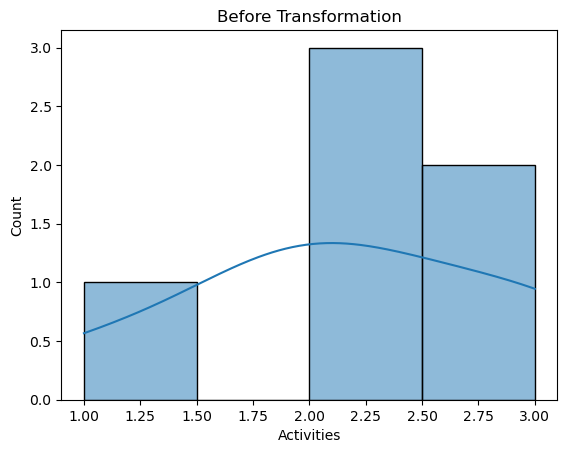

In [10]:
# 4. Transform the 'Activities' column using log1p to reduce skew
sns.histplot(df['Activities'], kde=True)
plt.title("Before Transformation")
plt.show()

In [11]:
df['Activities_Transformed'] = np.log1p(df['Activities'])

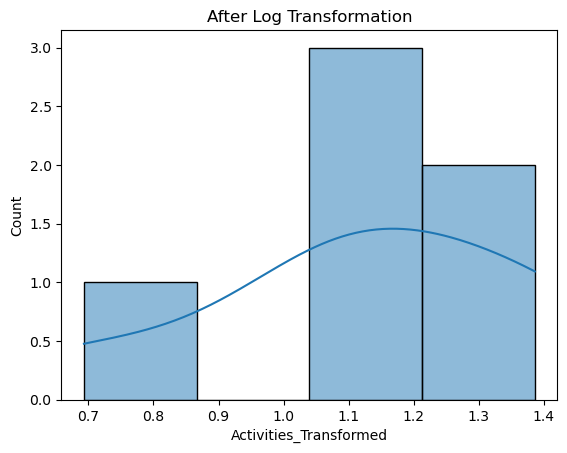

In [15]:
sns.histplot(df['Activities_Transformed'], kde=True)
plt.title("After Log Transformation")
plt.show()

In [13]:
print("\nFinal Dataset:\n")
df


Final Dataset:



,Student_ID,Math_Score,English_Score,Attendance,Activities,Activities_Transformed
0,1,88.000000,78,92.0,3,1.386294
1,2,92.000000,81,95.0,2,1.098612
2,3,87.444444,69,85.0,1,0.693147
5,6,91.000000,60,100.0,2,1.098612
7,8,67.000000,77,85.0,2,1.098612
8,9,59.000000,73,90.0,3,1.386294
